In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from download import download

np.set_printoptions(suppress=True)

In [2]:
OBS = 60
EXT = 20
EPOCH = 1000

In [3]:
xticker = "CL=F"
yticker = "HG=F"

In [4]:
apikey = open("apikey", "r").readline()
df = download(xticker, apikey).rename(columns={"adjClose": xticker})
df = df.merge(download(yticker, apikey), on="date").rename(columns={"adjClose": yticker})

In [5]:
t0 = np.array(df[xticker][0:-1])
t1 = np.array(df[xticker][1:])
xreturns = (t1 - t0) / t0
x = np.array(df[xticker].iloc[1:])

In [6]:
t0 = np.array(df[yticker][0:-1])
t1 = np.array(df[yticker][1:])
yreturns = (t1 - t0) / t0
y = np.array(df[yticker].iloc[1:])

In [7]:
xvaluation = []
yvaluation = []

for T in range(OBS-1, x.shape[0]):
    x0, y0 = x[T], y[T]
    xmu, ymu = xreturns[T+1-OBS:T+1].mean(), yreturns[T+1-OBS:T+1].mean()
    xsig, ysig = np.std(xreturns[T+1-OBS:T+1]), np.std(yreturns[T+1-OBS:T+1])
    xdrf, ydrf = xmu + 0.5 * xsig**2, ymu + 0.5 * ysig**2
    
    xbrown = np.cumsum(np.random.normal(0, 1, (EPOCH, EXT)), axis=1)
    ybrown = np.cumsum(np.random.normal(0, 1, (EPOCH, EXT)), axis=1)
    
    t = np.arange(1, EXT+1)
    xpath = x0 * np.exp(xdrf * t + xsig * xbrown)
    ypath = y0 * np.exp(ydrf * t + ysig * ybrown)
    
    xscore = float(sum(xpath.flatten() > x0)) / (EPOCH * EXT)
    yscore = float(sum(ypath.flatten() > y0)) / (EPOCH * EXT)
    
    xvaluation.append(xscore)
    yvaluation.append(yscore)

In [8]:
xvaluation = np.array(xvaluation)
yvaluation = np.array(yvaluation)

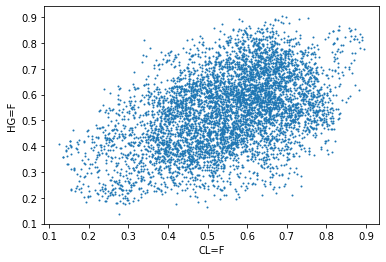

In [9]:
plt.scatter(xvaluation, yvaluation, s=1)
plt.xlabel(xticker)
plt.ylabel(yticker)
plt.show()